In [1]:
%load_ext autoreload
%autoreload 2
%cd ..
%cd ..

/cis/home/dpacker/my_documents/vote-counts/src
/cis/home/dpacker/my_documents/vote-counts


In [2]:
import jax
from jax import numpy as jnp, random
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

rngs = random.split(random.PRNGKey(seed=1), 10)

In [4]:
def get_returns(rng, num_voters, p, pi, num_trials=1):
  num_communities = pi.shape[0]

  memberships = random.choice(
      rngs[0], jnp.arange(num_communities), p=pi, shape=[num_trials, num_voters]
  )

  vote_probs = p[:, memberships]
  ballots = random.bernoulli(rng, p = vote_probs)
  return jnp.sum(ballots, axis=-1).T

def get_naive_returns(rng, num_voters, p_true, pi_true, num_trials = 1):
  naive_p = p_true @ pi_true
  ballots = random.bernoulli(rng, naive_p[None, :, None], shape=[num_trials, naive_p.shape[0], num_voters])
  return ballots.sum(axis = -1)

In [5]:
num_voters = 100
num_trials = 1_000
p_true = jnp.array([[0.9, 0.1], [0.8, 0.1], [0.1, 0.8]])
pi_true = jnp.array([0.7, 0.3])

returns = get_returns(rngs[1], num_voters, p_true, pi_true, num_trials=num_trials)
naive_returns = get_naive_returns(
    rngs[2], num_voters, p_true, pi_true, num_trials=num_trials
)

In [7]:
naive_returns.shape
# returns.shape

(1000, 3)

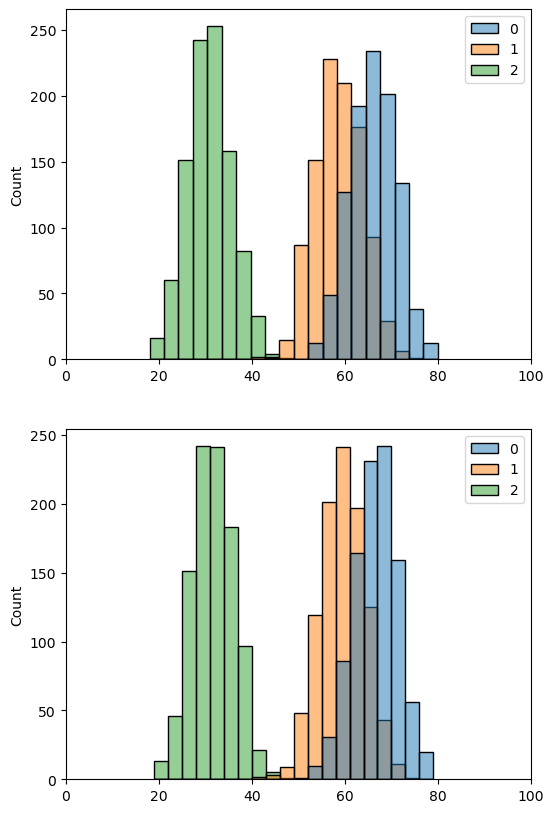

In [8]:
fig, axs = plt.subplots(2, 1, figsize = (6, 10))
sns.histplot(returns, bins = 20, ax = axs[0])
sns.histplot(naive_returns, bins = 20, ax = axs[1])

for ax in axs:
  ax.set(xlim = (0, 100))